In [ ]:
import pandas as pd                                                       # data manipulation and analysis
import numpy as np                                                        # numerical computations and array operations
import seaborn as sns                                                     # statistical data visualization
import matplotlib.pyplot as plt                                           # creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score     # splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder           # preprocessing tools for scaling and encoding
from sklearn.impute import SimpleImputer                                  # preprossessing tools for handling missing values
from sklearn.linear_model import LinearRegression                         # regression analysis
from sklearn.neighbors import KNeighborsRegressor                         # knn model
from sklearn.metrics import mean_squared_error                            # used for model evaluation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
!git clone https://github.com/LucassHo/firstByteDataset.git

Cloning into 'firstByteDataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 47.04 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
chefsmeal = pd.read_csv('./firstByteDataset/chefsmeal.csv')
coreboost = pd.read_csv('./firstByteDataset/coreboost.csv')
flexfield = pd.read_csv('./firstByteDataset/flexfield_fitness.csv')
pulsegear = pd.read_csv('./firstByteDataset/pulsegear.csv')

In [ ]:
chefsmeal.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Hours at Gym (per week),65
Fitness Goal,0
Calorie Intake,39
Dietary Preferences,42
Average Spend per Meal Order,42


In [ ]:
chefsmeal = pd.concat([chefsmeal, flexfield['Gym Membership Length (years)']], axis=1)
# Use pd.concat to combine the DataFrames along columns (axis=1)
# This adds 'Gym Membership Length (years)' as a new column to 'chefsmeal'.

In [ ]:
chefsmeal

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order,Gym Membership Length (years)
0,221958,Female,27,7.3,Build muscle,NaN,Whole foods,67.15,4
1,771155,Female,24,6.2,Endurance training,2173.0,Whole foods,52.94,4
2,231932,Male,22,7.4,Fat loss,1752.0,Whole foods,38.13,2
3,465838,Female,23,6.0,Build muscle,2884.0,High protein,61.44,0
4,359178,Female,18,9.3,Build muscle,2559.0,Whole foods,69.78,5
...,...,...,...,...,...,...,...,...,...
995,350875,Male,24,7.0,Build muscle,2619.0,High protein,54.72,1
996,563389,Male,20,8.8,Build muscle,2614.0,Vegan,58.18,4
997,170390,Male,29,3.7,Endurance training,2012.0,Whole foods,54.96,1
998,807689,Female,32,5.5,Build muscle,2568.0,Whole foods,66.05,2


In [ ]:
# prompt: create meal dataframe that only has the columns calorie intale, dietary preferences and fitness goal and hours at gym per week

meal_df = chefsmeal[['Calorie Intake', 'Dietary Preferences', 'Fitness Goal', 'Hours at Gym (per week)']]
meal_df

,Calorie Intake,Dietary Preferences,Fitness Goal,Hours at Gym (per week)
0,NaN,Whole foods,Build muscle,7.3
1,2173.0,Whole foods,Endurance training,6.2
2,1752.0,Whole foods,Fat loss,7.4
3,2884.0,High protein,Build muscle,6.0
4,2559.0,Whole foods,Build muscle,9.3
...,...,...,...,...
995,2619.0,High protein,Build muscle,7.0
996,2614.0,Vegan,Build muscle,8.8
997,2012.0,Whole foods,Endurance training,3.7
998,2568.0,Whole foods,Build muscle,5.5


In [ ]:
meal_df = chefsmeal[['Calorie Intake', 'Dietary Preferences', 'Fitness Goal', 'Hours at Gym (per week)']]
meal_df = meal_df.dropna(subset=['Calorie Intake', 'Dietary Preferences', 'Fitness Goal', 'Hours at Gym (per week)'])
# Separate features (X) and target variable (y)
X = meal_df[['Dietary Preferences', 'Fitness Goal', 'Hours at Gym (per week)']]
y = meal_df['Calorie Intake']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Create a column transformer to handle categorical features
categorical_features = ['Dietary Preferences', 'Fitness Goal']
numerical_features = ['Hours at Gym (per week)']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
# Create a pipeline with the preprocessor and linear regression
pipeline = make_pipeline(preprocessor, LinearRegression())

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

# Print the average RMSE across folds
print("Average RMSE across 5 folds:", rmse_scores.mean())

Average RMSE across 5 folds: 164.1510917047089


RMSE on test set: 169.69457858163884


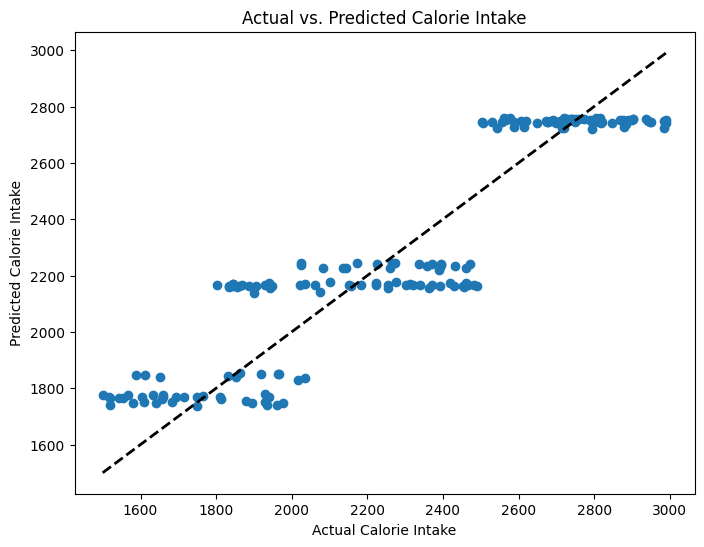

In [ ]:
# Fit the pipeline on the entire training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse)

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calorie Intake")
plt.ylabel("Predicted Calorie Intake")
plt.title("Actual vs. Predicted Calorie Intake")

# Draw the x=y line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

ValueError: Shape of passed values is (737, 1), indices imply (737, 8)

In [ ]:
# Should add before imputation:
for column in flexfield.columns:
    missing_percentage = (flexfield[column].isnull().sum() / len(flexfield)) * 100
    print(f"{column}: {missing_percentage:.2f}% missing")

Customer ID: 0.00% missing
Gender: 0.00% missing
Age: 0.00% missing
Hours at Gym (per week): 6.50% missing
Fitness Goal: 0.00% missing
Gym Membership Length (years): 0.00% missing
Calorie Intake: 3.90% missing


In [ ]:
# Better approach considering relationships:
def impute_gym_hours(df):
    # Group by relevant factors (e.g., membership type, age group)
    return df['Hours at Gym (per week)'].fillna(
        df.groupby(['Membership Type'])['Hours at Gym (per week)'].transform('median')
    )

In [ ]:
# Better version with documentation:
def impute_with_documentation(df, column, method='median'):
    # Store original statistics
    original_stats = df[column].describe()

    # Perform imputation
    if method == 'median':
        df[column] = df[column].fillna(df[column].median())

    # Store new statistics
    new_stats = df[column].describe()

    # Document changes
    print(f"Impact of imputation on {column}:")
    print("Before:", original_stats)
    print("After:", new_stats)

    return df

impute_with_documentation(flexfield, 'Hours at Gym (per week)', method='median')

Impact of imputation on Hours at Gym (per week):
Before: count    1000.000000
mean        6.145500
std         1.240717
min         3.000000
25%         5.300000
50%         6.100000
75%         7.000000
max        10.300000
Name: Hours at Gym (per week), dtype: float64
After: count    1000.000000
mean        6.145500
std         1.240717
min         3.000000
25%         5.300000
50%         6.100000
75%         7.000000
max        10.300000
Name: Hours at Gym (per week), dtype: float64


,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,221958,Female,27,7.3,Build muscle,4,NaN
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0
3,465838,Female,23,6.0,Build muscle,0,2884.0
4,359178,Female,18,9.3,Build muscle,5,2559.0
...,...,...,...,...,...,...,...
995,350875,Male,24,7.0,Build muscle,1,2619.0
996,563389,Male,20,8.8,Build muscle,4,2614.0
997,170390,Male,29,3.7,Endurance training,1,2012.0
998,807689,Female,32,5.5,Build muscle,2,2568.0


In [ ]:
# Better approach with validation:
def validate_and_impute(df, column):
    # Check distribution
    skewness = df[column].skew()

    # Choose method based on distribution
    if abs(skewness) > 1:  # If significantly skewed
        df[column] = df[column].fillna(df[column].median())
        method = 'median (skewed distribution)'
    else:
        df[column] = df[column].fillna(df[column].mean())
        method = 'mean (normal distribution)'

    print(f"Used {method} for {column}")
    return df

def handle_missing_values(datasets):
    """
    Comprehensive missing value handling for all datasets
    """
    for name, df in datasets.items():
        print(f"\nProcessing {name} dataset:")

        # Analyze missing values
        for column in df.columns:
            missing_pct = (df[column].isnull().sum() / len(df)) * 100
            print(f"{column}: {missing_pct:.2f}% missing")

        # Handle numeric variables
        if 'Hours at Gym (per week)' in df.columns:
            df = validate_and_impute(df, 'Hours at Gym (per week)')

        if 'Average Spend per Meal Order' in df.columns:
            df = validate_and_impute(df, 'Average Spend per Meal Order')

        # Handle categorical variables with 'Unknown'
        categorical_cols = ['Type of Apparel Purchased',
                          'Preferred Sports Drink Type',
                          'Dietary Preferences']

        for col in categorical_cols:
            if col in df.columns:
                missing_before = df[col].isnull().sum()
                df[col] = df[col].fillna('Unknown')
                print(f"Replaced {missing_before} missing values in {col} with 'Unknown'")

        datasets[name] = df

    return datasets

# Usage
datasets = {
    'chefsmeal': chefsmeal
}

cleaned_datasets = handle_missing_values(datasets)


Processing chefsmeal dataset:
Customer ID: 0.00% missing
Gender: 0.00% missing
Age: 0.00% missing
Hours at Gym (per week): 6.50% missing
Fitness Goal: 0.00% missing
Calorie Intake: 3.90% missing
Dietary Preferences: 4.20% missing
Average Spend per Meal Order: 4.20% missing
Used mean (normal distribution) for Hours at Gym (per week)
Used mean (normal distribution) for Average Spend per Meal Order
Replaced 42 missing values in Dietary Preferences with 'Unknown'


NameError: name 'chefsmeal' is not defined

Training Results:
RMSE: 53.66
R2 Score: 0.985

Validation Results:
RMSE: 153.57
R2 Score: 0.875

Test Results:
RMSE: 152.19
R2 Score: 0.878



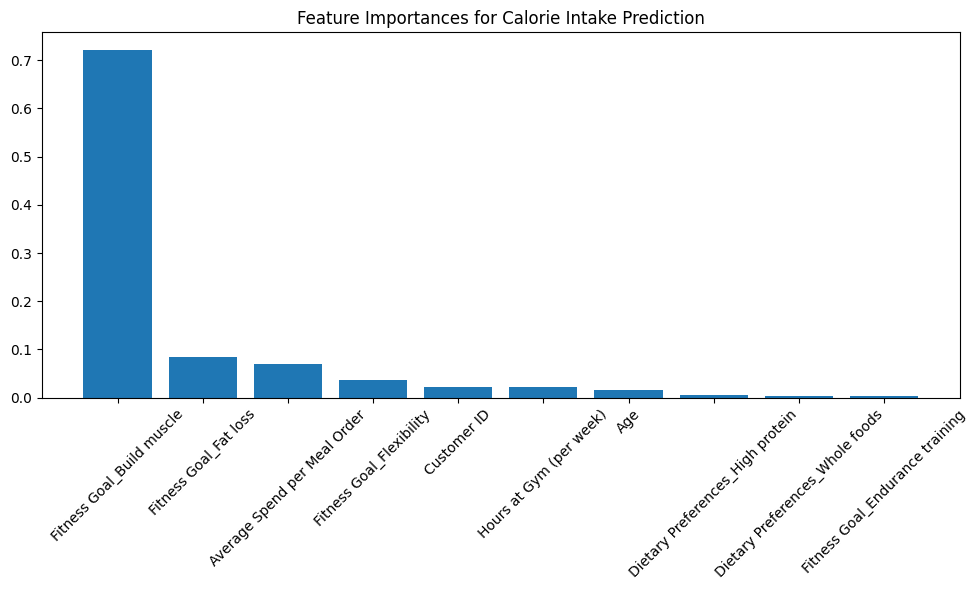

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a CSV file named 'chefsmeal_d
df = chefsmeal

# Data preprocessing
def preprocess_data(df):
    # Drop any rows with missing values
    df = df.dropna()

    # Convert categorical variables to numerical using one-hot encoding
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns)

    return df

# Prepare features and target
def prepare_data(df):
    # Assuming 'CalorieIntake' is the target column
    X = df.drop('Calorie Intake', axis=1)
    y = df['Calorie Intake']

    # First split: 80% train+valid, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Second split: 75% train, 25% valid (60% and 20% of total respectively)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Feature scaling
def scale_features(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_valid_scaled, X_test_scaled, scaler

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X, y, dataset_name):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)

    print(f"{dataset_name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.3f}\n")

    return predictions, rmse, r2

# Feature importance analysis
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances for Calorie Intake Prediction")
    plt.bar(range(10), importances[indices[:10]])
    plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution pipeline
def main():
    # Preprocess data
    processed_df = preprocess_data(df)

    # Prepare train, validation, and test sets
    X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_data(processed_df)

    # Scale features
    X_train_scaled, X_valid_scaled, X_test_scaled, scaler = scale_features(X_train, X_valid, X_test)

    # Train model
    model = train_model(X_train_scaled, y_train)

    # Evaluate on all sets
    train_predictions, train_rmse, train_r2 = evaluate_model(model, X_train_scaled, y_train, "Training")
    valid_predictions, valid_rmse, valid_r2 = evaluate_model(model, X_valid_scaled, y_valid, "Validation")
    test_predictions, test_rmse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")

    # Plot feature importance
    plot_feature_importance(model, X_train.columns)

    return model, scaler

if __name__ == "__main__":
    model, scaler = main()

In [ ]:
chefsmeal

,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order
0,Female,27,7.3,Build muscle,NaN,Whole foods,67.15
1,Female,24,6.2,Endurance training,2173.0,Whole foods,52.94
2,Male,22,7.4,Fat loss,1752.0,Whole foods,38.13
3,Female,23,6.0,Build muscle,2884.0,High protein,61.44
4,Female,18,9.3,Build muscle,2559.0,Whole foods,69.78
...,...,...,...,...,...,...,...
995,Male,24,7.0,Build muscle,2619.0,High protein,54.72
996,Male,20,8.8,Build muscle,2614.0,Vegan,58.18
997,Male,29,3.7,Endurance training,2012.0,Whole foods,54.96
998,Female,32,5.5,Build muscle,2568.0,Whole foods,66.05


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Load and preprocess data (same as before)
def preprocess_data(df):
    df = df.dropna()
    categorical_columns = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_columns)
    return df

# Modified data splitting with cross-validation
def prepare_data(df):
    X = df.drop('Calorie Intake', axis=1)
    y = df['Calorie Intake']

    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

    return X_train, X_valid, X_test, y_train, y_valid, y_test

# Feature scaling
def scale_features(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_valid_scaled, X_test_scaled, scaler

# Hyperparameter tuning
def tune_hyperparameters(X_train, y_train):
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }

    rf = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        random_state=42,
        n_jobs=-1,
        scoring='neg_root_mean_squared_error'
    )

    random_search.fit(X_train, y_train)
    print("Best parameters:", random_search.best_params_)
    return random_search.best_estimator_

# Cross-validation evaluation
def evaluate_with_cv(model, X, y, n_splits=5):
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = -cross_val_score(
        model, X, y,
        scoring='neg_root_mean_squared_error',
        cv=cv
    )
    r2_scores = cross_val_score(
        model, X, y,
        scoring='r2',
        cv=cv
    )

    print(f"\nCross-validation results ({n_splits} folds):")
    print(f"Average RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std() * 2:.2f})")
    print(f"Average R2: {r2_scores.mean():.3f} (+/- {r2_scores.std() * 2:.3f})")

    return rmse_scores, r2_scores

# Enhanced evaluation
def evaluate_model(model, X, y, dataset_name):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)

    print(f"\n{dataset_name} Results:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.3f}")

    # Calculate prediction intervals
    tree_predictions = np.array([tree.predict(X) for tree in model.estimators_])
    conf_interval = np.percentile(tree_predictions, [2.5, 97.5], axis=0)

    return predictions, rmse, r2, conf_interval

# Feature importance with error bars


# Main execution pipeline
def main():
    processed_df = preprocess_data(df)

    # Prepare datasets
    X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_data(processed_df)
    X_train_scaled, X_valid_scaled, X_test_scaled, scaler = scale_features(X_train, X_valid, X_test)

    # Tune and train model
    print("Tuning hyperparameters...")
    model = tune_hyperparameters(X_train_scaled, y_train)

    # Evaluate with cross-validation
    print("\nPerforming cross-validation...")
    cv_rmse, cv_r2 = evaluate_with_cv(model, X_train_scaled, y_train)

    # Final evaluation on all sets
    train_pred, train_rmse, train_r2, train_conf = evaluate_model(model, X_train_scaled, y_train, "Training")
    valid_pred, valid_rmse, valid_r2, valid_conf = evaluate_model(model, X_valid_scaled, y_valid, "Validation")
    test_pred, test_rmse, test_r2, test_conf = evaluate_model(model, X_test_scaled, y_test, "Test")

    # P
    return model, scaler

if __name__ == "__main__":
    model, scaler = main()

Tuning hyperparameters...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
265 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
85 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Performing cross-validation...

Cross-validation results (5 folds):
Average RMSE: 149.50 (+/- 14.41)
Average R2: 0.883 (+/- 0.036)

Training Results:
RMSE: 114.63
R2 Score: 0.932

Validation Results:
RMSE: 153.82
R2 Score: 0.875

Test Results:
RMSE: 150.57
R2 Score: 0.877


In [ ]:
chefsmeal.drop('Gender', axis = 1, inplace = True)

In [ ]:
chefsmeal

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order
0,221958,Female,27,7.3,Build muscle,NaN,Whole foods,67.15
1,771155,Female,24,6.2,Endurance training,2173.0,Whole foods,52.94
2,231932,Male,22,7.4,Fat loss,1752.0,Whole foods,38.13
3,465838,Female,23,6.0,Build muscle,2884.0,High protein,61.44
4,359178,Female,18,9.3,Build muscle,2559.0,Whole foods,69.78
...,...,...,...,...,...,...,...,...
995,350875,Male,24,7.0,Build muscle,2619.0,High protein,54.72
996,563389,Male,20,8.8,Build muscle,2614.0,Vegan,58.18
997,170390,Male,29,3.7,Endurance training,2012.0,Whole foods,54.96
998,807689,Female,32,5.5,Build muscle,2568.0,Whole foods,66.05


In [ ]:
chefsmeal.drop('Customer ID', axis = 1, inplace = True)

In [ ]:
chefsmeal.drop('Dietary Preferences', axis=1, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import xgboost as xgb

class CaloriePredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.poly = PolynomialFeatures(degree=2, include_bias=False)
        self.ensemble = None
        self.feature_names = None

    def create_interaction_features(self, df):
        """Create meaningful interaction features"""
        df = df.copy()

        # Interaction between fitness goals and gym hours
        if 'Hours_at_Gym' in df.columns and 'Fitness_Goal_Build_muscle' in df.columns:
            df['Gym_Muscle_Interaction'] = df['Hours_at_Gym'] * df['Fitness_Goal_Build_muscle']

        # BMI if height and weight are available
        if 'Height' in df.columns and 'Weight' in df.columns:
            df['BMI'] = df['Weight'] / (df['Height'] * df['Height'])

        # Activity level score
        activity_columns = [col for col in df.columns if 'Activity' in col]
        if activity_columns:
            df['Activity_Score'] = df[activity_columns].sum(axis=1)

        return df

    def preprocess_data(self, df):
        df = df.dropna()

        # Create basic features
        categorical_columns = df.select_dtypes(include=['object']).columns
        df = pd.get_dummies(df, columns=categorical_columns)

        # Add interaction features
        df = self.create_interaction_features(df)

        # Store feature names
        self.feature_names = df.columns.tolist()

        return df

    def prepare_data(self, df):
        X = df.drop('Calorie Intake', axis=1)
        y = df['Calorie Intake']

        # Create polynomial features
        X_poly = self.poly.fit_transform(X)

        # Split data
        X_temp, X_test, y_temp, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
        X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_valid_scaled = self.scaler.transform(X_valid)
        X_test_scaled = self.scaler.transform(X_test)

        return X_train_scaled, X_valid_scaled, X_test_scaled, y_train, y_valid, y_test

    def build_ensemble(self):
        # Random Forest with optimized parameters
        rf = RandomForestRegressor(
            n_estimators=200,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )

        # Gradient Boosting
        gb = GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )

        # XGBoost
        xgb_model = xgb.XGBRegressor(
            n_estimators=200,
            learning_rate=0.01,
            max_depth=5,
            random_state=42
        )

        # Lasso for linear relationships
        lasso = LassoCV(random_state=42)

        # Create voting ensemble
        self.ensemble = VotingRegressor([
            ('rf', rf),
            ('gb', gb),
            ('xgb', xgb_model),
            ('lasso', lasso)
        ])

    def evaluate_model(self, X, y, dataset_name):
        predictions = self.ensemble.predict(X)
        mse = mean_squared_error(y, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, predictions)

        print(f"\n{dataset_name} Results:")
        print(f"RMSE: {rmse:.2f}")
        print(f"R2 Score: {r2:.3f}")

        return predictions, rmse, r2

    def plot_feature_importance(self, X, y):
        self.ensemble.fit(X, y)
        importances = self.ensemble.named_estimators_

    def fit_and_evaluate(self, df):
        # Preprocess data
        processed_df = self.preprocess_data(df)

        # Prepare datasets
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.prepare_data(processed_df)

        # Build and train ensemble
        print("Building and training ensemble model...")
        self.build_ensemble()
        self.ensemble.fit(X_train, y_train)

        # Evaluate on all sets
        train_pred, train_rmse, train_r2 = self.evaluate_model(X_train, y_train, "Training")
        valid_pred, valid_rmse, valid_r2 = self.evaluate_model(X_valid, y_valid, "Validation")
        test_pred, test_rmse, test_r2 = self.evaluate_model(X_test, y_test, "Test")

        # Plot feature importance
        self.plot_feature_importance(X_train, y_train)

        return train_rmse, valid_rmse, test_rmse

# Usage example
if __name__ == "__main__":

    # Create and train model
    predictor = CaloriePredictor()
    train_rmse, valid_rmse, test_rmse = predictor.fit_and_evaluate(df)

Building and training ensemble model...

Training Results:
RMSE: 88.57
R2 Score: 0.959

Validation Results:
RMSE: 150.15
R2 Score: 0.881

Test Results:
RMSE: 152.47
R2 Score: 0.877


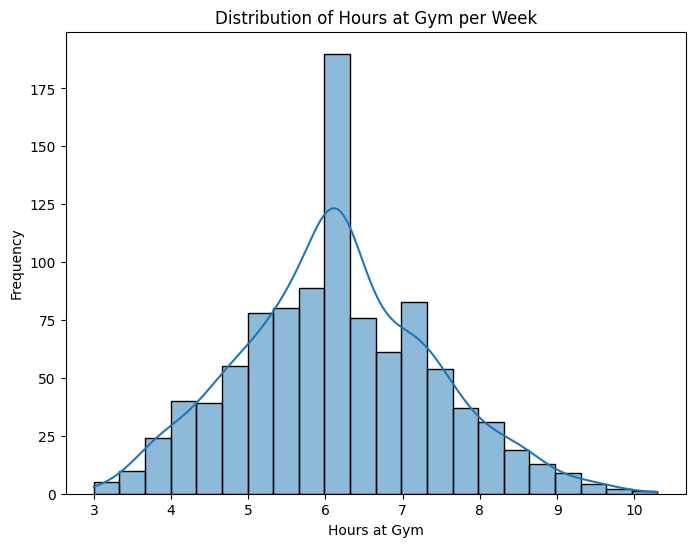

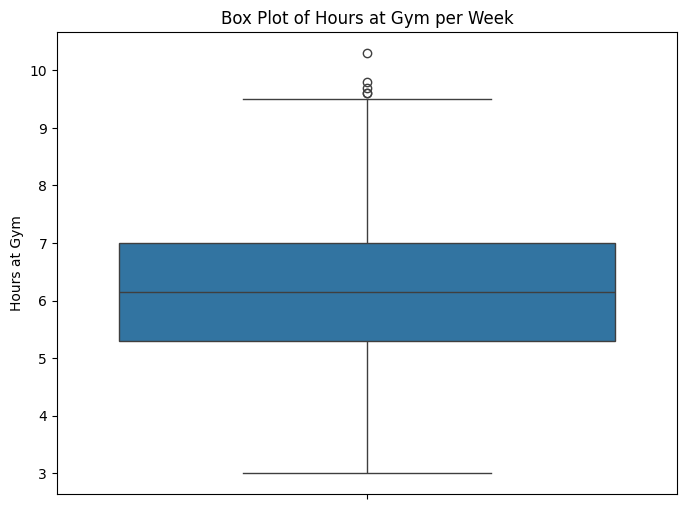

In [ ]:
# prompt: see the distribution and boxplot for hours at gym in chefsmeal

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'chefsmeal' DataFrame is already loaded and cleaned as in your provided code.

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(chefsmeal['Hours at Gym (per week)'], kde=True)
plt.title('Distribution of Hours at Gym per Week')
plt.xlabel('Hours at Gym')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=chefsmeal['Hours at Gym (per week)'])
plt.title('Box Plot of Hours at Gym per Week')
plt.ylabel('Hours at Gym')
plt.show()


In [ ]:
# Check column names for consistency
print("ChefsMeal Columns:", chefsmeal.columns)
print("FlexField Fitness Columns:", flexfield.columns)
print("CoreBoost Columns:", coreboost.columns)
print("PulseGear Columns:", pulsegear.columns)

# Merge the datasets on 'Customer ID', handling overlapping columns
from functools import reduce
data_frames = [chefsmeal, flexfield, coreboost, pulsegear]

def merge_dfs(left, right):
    # Find common columns (excluding 'Customer ID')
    common_cols = list(set(left.columns) & set(right.columns) - {'Customer ID'})

    # If common columns exist, select only non-common columns from the right DataFrame
    if common_cols:
        right = right[[c for c in right.columns if c not in common_cols or c == 'Customer ID']]

    # Perform the merge
    return pd.merge(left, right, on='Customer ID', how='outer')

combined_df = reduce(merge_dfs, data_frames)


# Display the first few rows to verify the merge
combined_df

ChefsMeal Columns: Index(['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)',
       'Fitness Goal', 'Calorie Intake', 'Dietary Preferences',
       'Average Spend per Meal Order'],
      dtype='object')
FlexField Fitness Columns: Index(['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)',
       'Fitness Goal', 'Gym Membership Length (years)', 'Calorie Intake'],
      dtype='object')
CoreBoost Columns: Index(['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)',
       'Fitness Goal', 'Preferred Sports Drink Type',
       'Average Weekly Consumption (Bottles)'],
      dtype='object')
PulseGear Columns: Index(['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)',
       'Fitness Goal', 'Average Spend on Apparel ($/year)',
       'Type of Apparel Purchased', 'Primary Apparel Purchase Channel'],
      dtype='object')


,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order,Gym Membership Length (years),Preferred Sports Drink Type,Average Weekly Consumption (Bottles),Average Spend on Apparel ($/year),Type of Apparel Purchased,Primary Apparel Purchase Channel
0,100404,Female,20,5.500000,Endurance training,2386.0,Whole foods,56.59,0,Energy drinks,8,685.18,Outerwear,Physical Retailer
1,101252,Female,22,6.200000,Endurance training,2061.0,Whole foods,38.73,1,Electrolyte,11,336.84,Accessories,Brand Website
2,102869,Female,23,6.600000,Flexibility,1697.0,Whole foods,49.29,4,Fresh juice,9,521.33,Performance,E-commerce Retailer
3,103051,Female,21,6.500000,Fat loss,1985.0,Low carb,43.85,0,Electrolyte,10,749.20,Footwear,Physical Retailer
4,103267,Male,28,7.000000,Flexibility,2120.0,Whole foods,52.78,5,Fresh juice,9,878.18,Yoga,Physical Retailer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,997421,Female,27,6.148663,Fat loss,1585.0,High protein,31.43,1,Protein shakes,6,501.88,Performance,Physical Retailer
996,998320,Female,22,8.800000,Fat loss,1609.0,High protein,37.04,4,Protein shakes,9,683.70,Accessories,Brand Website
997,998613,Male,31,5.800000,Build muscle,2904.0,High protein,60.94,2,Protein shakes,7,668.04,Unknown,E-commerce Retailer
998,999159,Male,25,4.400000,General health,2371.0,Whole foods,54.75,1,Protein shakes,8,699.35,Footwear,Physical Retailer


In [ ]:
# prompt: check inconsistent datatypes in each column

# Check for inconsistent data types in each column
for col in combined_df.columns:
    print(f"Column '{col}': {combined_df[col].dtype}")
    unique_types = combined_df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(f"  Inconsistent data types: {unique_types}")

Column 'Customer ID': int64
Column 'Gender': object
Column 'Age': int64
Column 'Hours at Gym (per week)': float64
Column 'Fitness Goal': object
Column 'Calorie Intake': float64
Column 'Dietary Preferences': object
Column 'Average Spend per Meal Order': float64
Column 'Gym Membership Length (years)': float64
Column 'Preferred Sports Drink Type': object
Column 'Average Weekly Consumption (Bottles)': int64
Column 'Average Spend on Apparel ($/year)': float64
Column 'Type of Apparel Purchased': object
Column 'Primary Apparel Purchase Channel': object
Column 'Engagement Score': float64


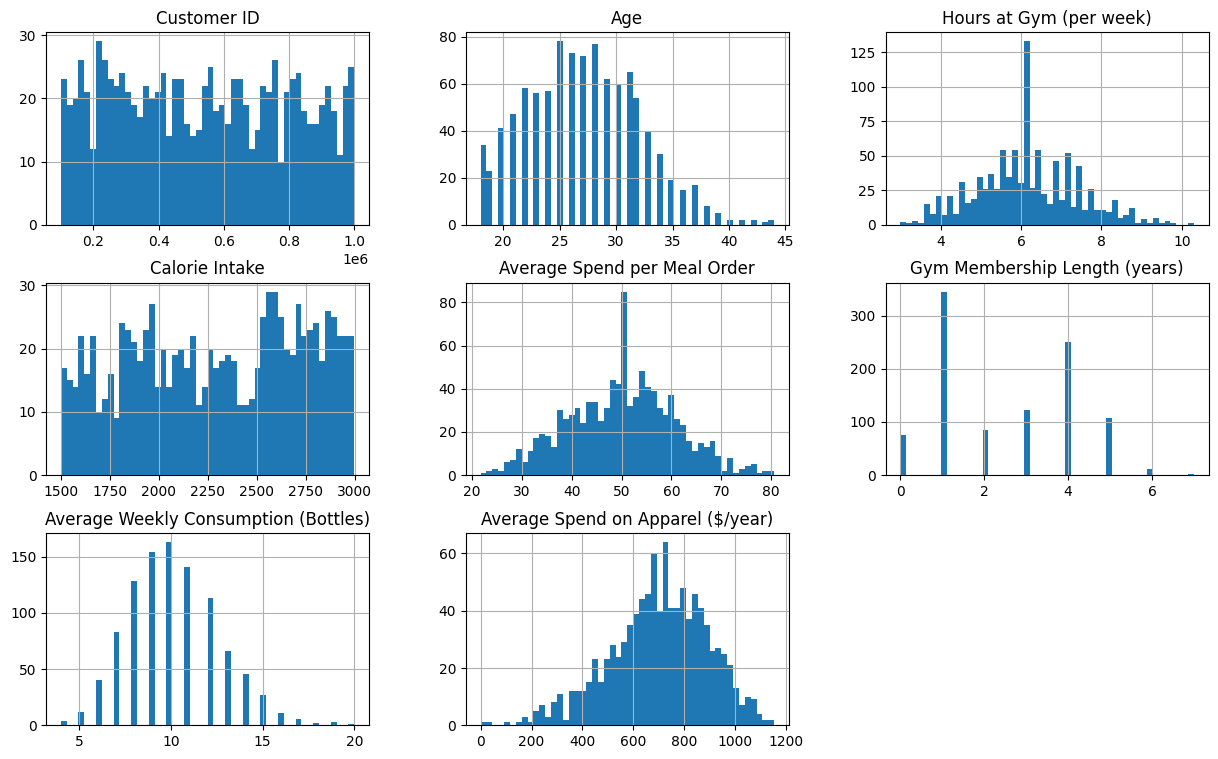

In [ ]:
pd.DataFrame(combined_df).hist(bins=50, figsize=(15,9));plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

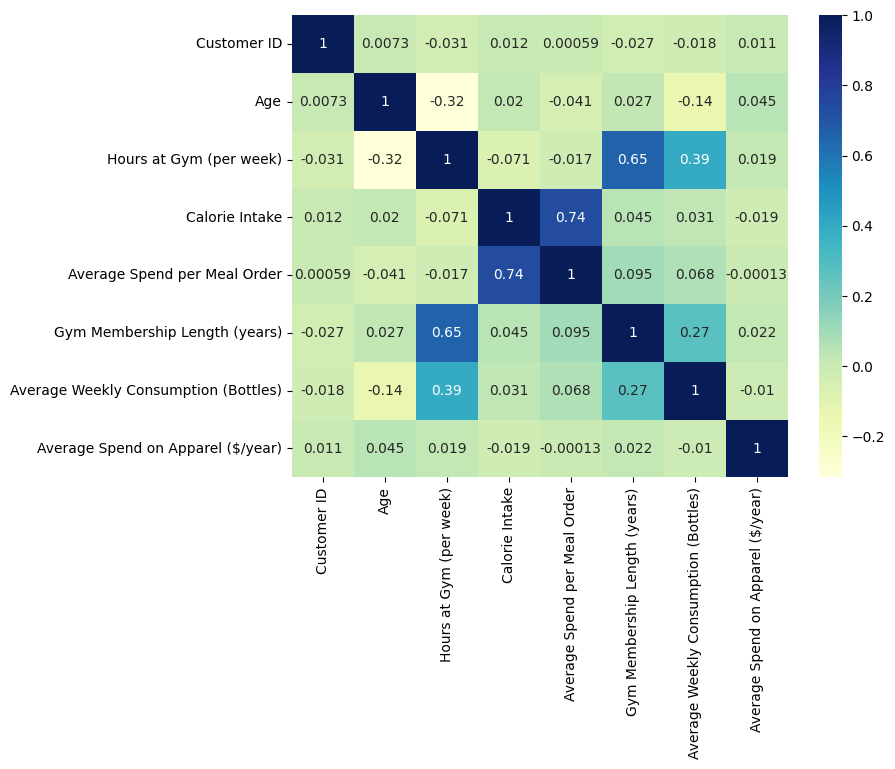

In [ ]:
numerical_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = combined_df.select_dtypes(include=['object']).columns
plt.figure(figsize=(8,6))
sns.heatmap(combined_df[numerical_cols].corr(),cmap='YlGnBu',annot=True)
plt.show

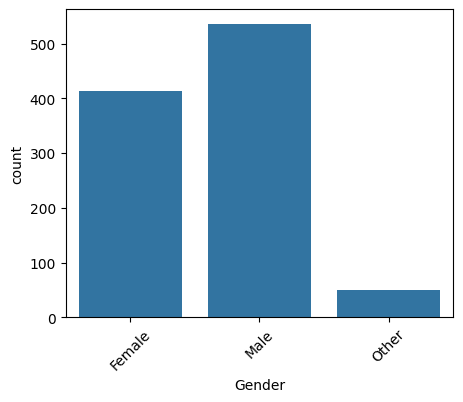

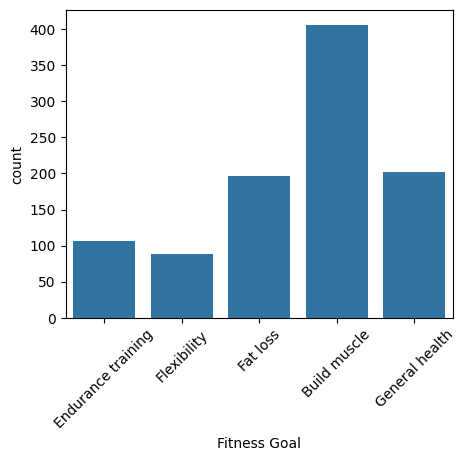

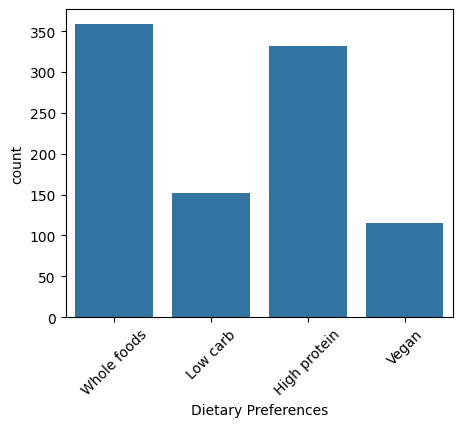

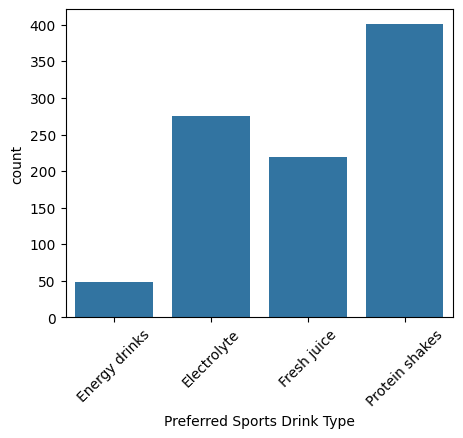

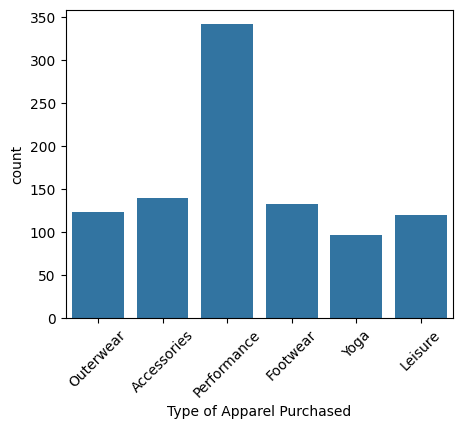

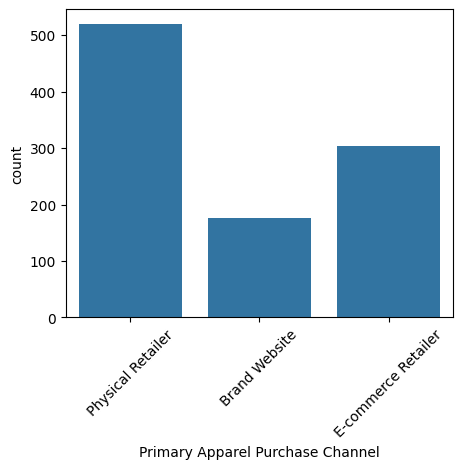

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(5,4))
  sns.countplot(data=combined_df,x=col)
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
combined_df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Hours at Gym (per week),65
Fitness Goal,0
Calorie Intake,39
Dietary Preferences,42
Average Spend per Meal Order,42
Gym Membership Length (years),0
Preferred Sports Drink Type,54


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer ID                           1000 non-null   int64  
 1   Gender                                1000 non-null   object 
 2   Age                                   1000 non-null   int64  
 3   Hours at Gym (per week)               935 non-null    float64
 4   Fitness Goal                          1000 non-null   object 
 5   Calorie Intake                        961 non-null    float64
 6   Dietary Preferences                   958 non-null    object 
 7   Average Spend per Meal Order          958 non-null    float64
 8   Gym Membership Length (years)         1000 non-null   int64  
 9   Preferred Sports Drink Type           946 non-null    object 
 10  Average Weekly Consumption (Bottles)  1000 non-null   int64  
 11  Average Spend on A

In [ ]:
combined_df.describe()


,Customer ID,Age,Hours at Gym (per week),Calorie Intake,Average Spend per Meal Order,Gym Membership Length (years),Average Weekly Consumption (Bottles),Average Spend on Apparel ($/year)
count,1000.000000,1000.000000,935.000000,961.000000,958.000000,1000.000000,1000.000000,1000.00000
mean,538112.094000,27.127000,6.148663,2295.334027,50.089927,2.507000,10.142000,700.07309
std,262574.257707,5.017773,1.283104,437.179461,10.923013,1.652477,2.498415,191.33611
min,100404.000000,18.000000,3.000000,1500.000000,21.750000,0.000000,4.000000,0.00000
25%,301536.000000,23.000000,5.300000,1922.000000,42.072500,1.000000,8.000000,585.00500
50%,538556.500000,27.000000,6.100000,2321.000000,50.320000,2.000000,10.000000,713.31500
75%,762517.000000,31.000000,7.100000,2686.000000,57.575000,4.000000,12.000000,836.90500
max,999684.000000,44.000000,10.300000,2997.000000,80.590000,7.000000,20.000000,1152.37000


In [ ]:
combined_df['Gym Membership Length (years)']

,count
Gym Membership Length (years),
1,345
4,250
3,122
5,108
2,85
0,76
6,12
7,2


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Normalize the features to have values between 0 and 1
scaler = MinMaxScaler()
combined_df[['Gym Membership Length (years)', 'Hours at Gym (per week)']] = scaler.fit_transform(combined_df[['Gym Membership Length (years)', 'Hours at Gym (per week)']])

# Create an engagement score
# You can adjust the weights to give more importance to one feature over the other
combined_df['Engagement Score'] = 0.5 * combined_df['Gym Membership Length (years)'] + 0.5 * combined_df['Hours at Gym (per week)']
# Changed df to combined_df, assuming you intended to use the same DataFrame for both features.

# Display the DataFrame with the new feature
# Instead of using the unavailable 'ace_tools', display the first few rows using pandas' head() method.
combined_df

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order,Gym Membership Length (years),Preferred Sports Drink Type,Average Weekly Consumption (Bottles),Average Spend on Apparel ($/year),Type of Apparel Purchased,Primary Apparel Purchase Channel,Engagement Score
0,100404,Female,20,0.342466,Endurance training,2386.0,Whole foods,56.59,0.000000,Energy drinks,8,685.18,Outerwear,Physical Retailer,0.171233
1,101252,Female,22,0.438356,Endurance training,2061.0,Whole foods,38.73,0.142857,Electrolyte,11,336.84,Accessories,Brand Website,0.290607
2,102869,Female,23,0.493151,Flexibility,1697.0,Whole foods,49.29,0.571429,Fresh juice,9,521.33,Performance,E-commerce Retailer,0.532290
3,103051,Female,21,0.479452,Fat loss,1985.0,Low carb,43.85,0.000000,Electrolyte,10,749.20,Footwear,Physical Retailer,0.239726
4,103267,Male,28,0.547945,Flexibility,2120.0,Whole foods,52.78,0.714286,Fresh juice,9,878.18,Yoga,Physical Retailer,0.631115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,997421,Female,27,0.424658,Fat loss,1585.0,High protein,31.43,0.142857,Protein shakes,6,501.88,Performance,Physical Retailer,0.283757
996,998320,Female,22,0.794521,Fat loss,1609.0,High protein,37.04,0.571429,Protein shakes,9,683.70,Accessories,Brand Website,0.682975
997,998613,Male,31,0.383562,Build muscle,2904.0,High protein,60.94,0.285714,Protein shakes,7,668.04,Unknown,E-commerce Retailer,0.334638
998,999159,Male,25,0.191781,General health,2371.0,Whole foods,54.75,0.142857,Protein shakes,8,699.35,Footwear,Physical Retailer,0.167319


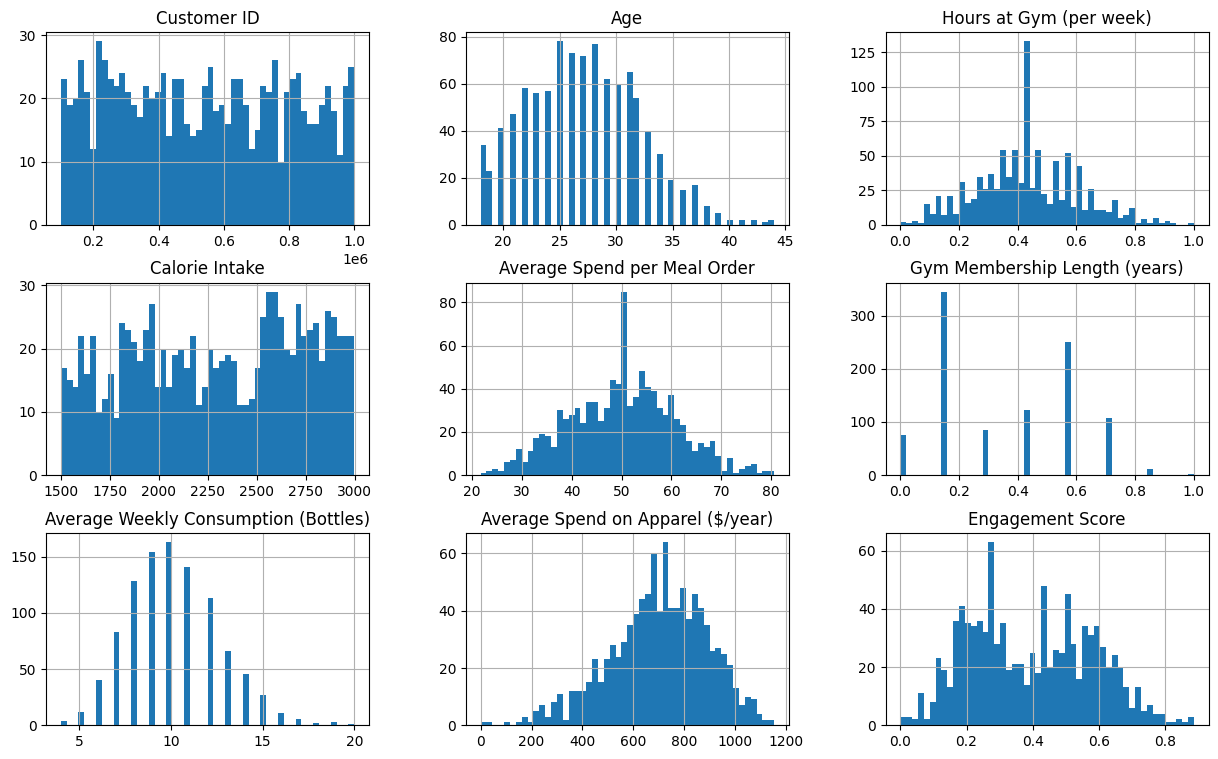

In [ ]:
pd.DataFrame(combined_df).hist(bins=50, figsize=(15,9));plt.show()

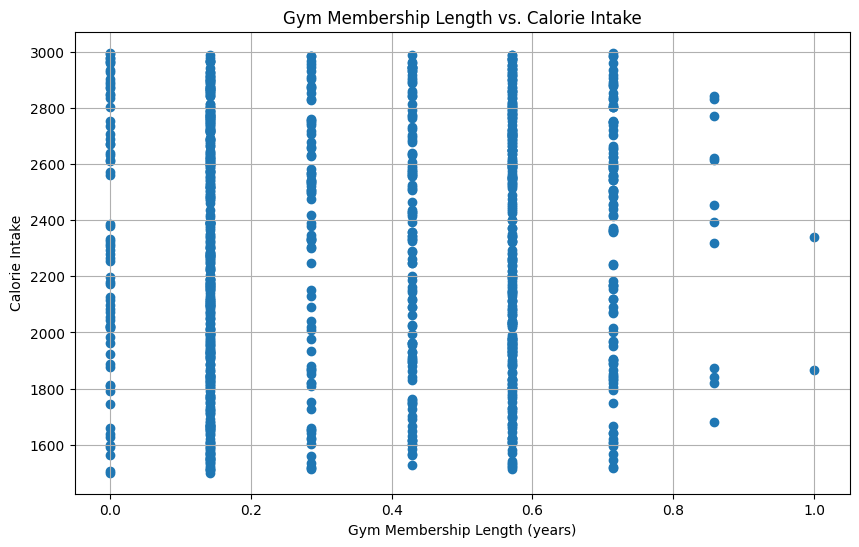

In [ ]:
# prompt: plot gym membership length against calorie intake

import matplotlib.pyplot as plt

# Assuming 'combined_df' is your DataFrame and it contains 'Gym Membership Length (years)' and 'Calorie Intake' columns.
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Gym Membership Length (years)'], combined_df['Calorie Intake'])
plt.xlabel('Gym Membership Length (years)')
plt.ylabel('Calorie Intake')
plt.title('Gym Membership Length vs. Calorie Intake')
plt.grid(True)
plt.show()

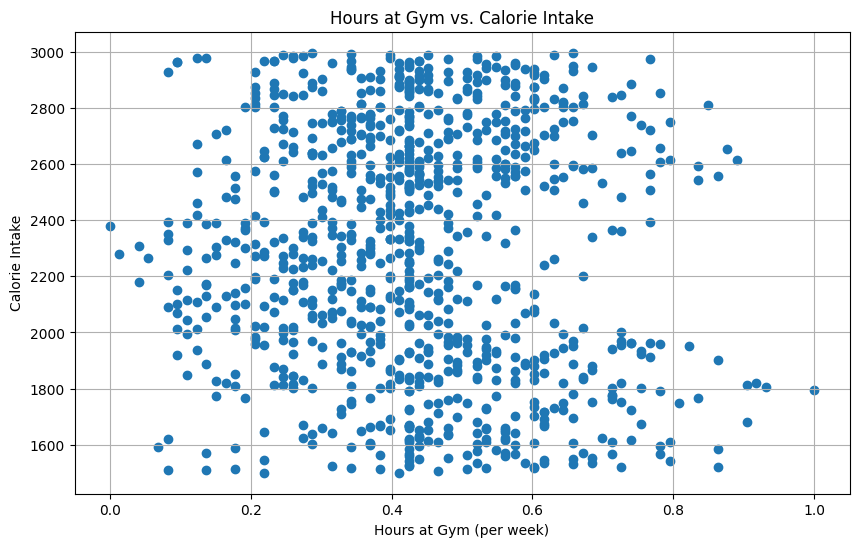

In [ ]:
# prompt: plot calorie intake and hours at gym

# Assuming 'combined_df' is your DataFrame and it contains 'Hours at Gym (per week)' and 'Calorie Intake' columns.
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Hours at Gym (per week)'], combined_df['Calorie Intake'])
plt.xlabel('Hours at Gym (per week)')
plt.ylabel('Calorie Intake')
plt.title('Hours at Gym vs. Calorie Intake')
plt.grid(True)
plt.show()